In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics, datasets, linear_model, model_selection

df = pd.read_csv('student_study_hours.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
df.describe()

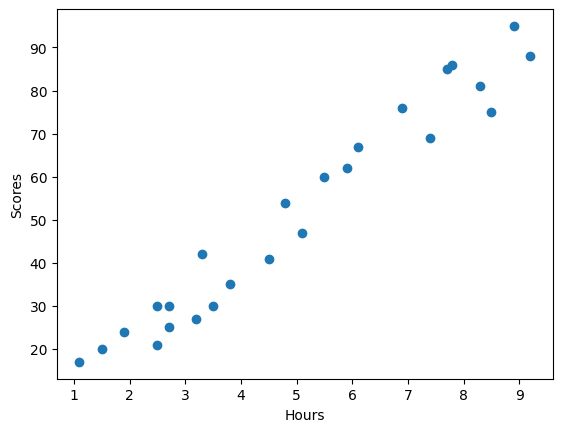

In [2]:
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.draw()

In [3]:
df['Hours'].corr(df['Scores'])

np.float64(0.9761906560220887)

In [4]:
X = df['Hours'].values
X = X.reshape(-1,1) #ilość rzedow i ilosc kolumn -> -1 oznacza ustaw sobie sam
print(type(X))
print(X.shape)
y = df['Scores']

<class 'numpy.ndarray'>
(25, 1)


In [5]:
X_train, X_test, y_train, y_test =model_selection.train_test_split(X,y,test_size=0.2)


In [6]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
X_test

In [ ]:
y_test

In [7]:
predictions = model.predict(X_test)
predictions

array([28.54030064, 88.08702776, 68.87840611, 45.82806013, 34.30288714])

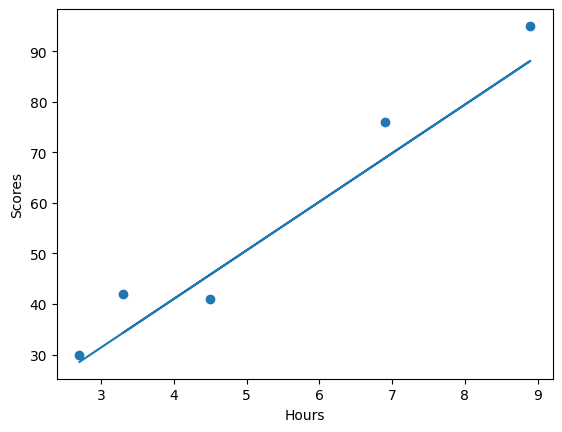

In [8]:
plt.scatter(X_test,y_test)
plt.plot(X_test,predictions)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.draw()

In [10]:
b = model.intercept_ #wysoksc
a = model.coef_[0] #slope

print(b) # dla osoby z 0h nauki = 2.6 
print(a) # za każdą godzine nauki przyznaje przyznaje 9.6 punkta

2.6086614173228213
9.604310824783266


In [11]:
import numpy as np
rmse = np.sqrt(metrics.mean_squared_error(y_test,predictions))
print(f'RMSE = {rmse} ({rmse/np.mean(predictions)*100:3.3}%)')


RMSE = 6.052978076754187 (11.4%)


In [12]:
pre_train_r2 = model.score(X_train, y_train)
pre_test_r2 = model.score(X_test, y_test)
print('Model determination train: ', pre_train_r2 )
print('Model determination test: ', pre_test_r2 )

Model determination train:  0.954184691038914
Model determination test:  0.939235532045796


In [13]:
model.predict([[2.5]])

array([26.61943848])